In [1]:
import matplotlib.pyplot as plt
import gzip
from numpy import *
from numpy.linalg import *
from matplotlib import rcParams
from sklearn import linear_model
import scipy
import random
from scipy import io
import os


In [2]:
%matplotlib inline  

In [33]:
import h5py
f = h5py.File('BZ.mat', 'r')
    
print(list(f.keys()))
BZ_tensor = f['BZ_tensor']

['BZ_tensor']


1200
451
351


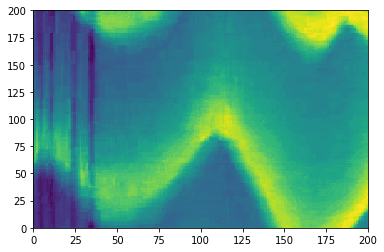

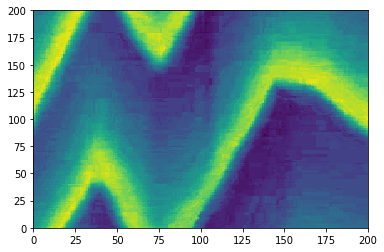

In [59]:
[m,n,k]=(BZ_tensor).shape # x vs y vs time data
print(m)
print(n)
print(k)
plt.pcolormesh(BZ_tensor[:200,:200,0])
plt.show()
plt.pcolormesh(BZ_tensor[:200,:200,300])
# print(BZ_tensor[:100,:100,0])
# for j in range(100):
#     A=BZ_tensor[:,:,j]
#     plt.pcolor(A)
#     plt.show()


In [60]:
BZ_tensor_2d = reshape(BZ_tensor, [m*n, k])

BZ_tensor_2d_small = reshape(BZ_tensor[:200,:200,:], [200*200, k])

In [101]:
def DMD(X,Xprime,r): #Copied from notes
    U,Sigma,VT = svd(X,full_matrices=0) # Step 1
    Ur = U[:,:r]
    Sigmar = diag(Sigma[:r])
    VTr = VT[:r,:]
    Atilde = solve(Sigmar.T,(Ur.T @ Xprime @ VTr.T).T).T # Step 2
    Lambda, W = eig(Atilde) # Step 3
    Lambda = diag(Lambda)
    
    Phi = Xprime @ solve(Sigmar.T,VTr).T @ W # Step 4
    alpha1 = Sigmar @ VTr[:,0]
    b = solve(W @ Lambda,alpha1)
    return Phi, Lambda, b

In [89]:
Phi, Lambda, b = DMD(BZ_tensor_2d_small[:, :150],BZ_tensor_2d_small[:,1:151],50)

(50, 50)
(40000, 50)
(40000, 150)
(50, 150)


In [92]:
x = []
for t in range(350):
    x_t = matmul(Phi, matmul((Lambda ** t), b))#np.matmul(Phi, scipy.linalg.expm(Omega * t) * np.matrix.transpose(b))
    x.append(x_t)
x = array(x)
print(x.shape)
x_3d = reshape(x, [350, 200,200])
print(x_3d.shape)

(350, 40000)
(350, 200, 200)


(200, 200)


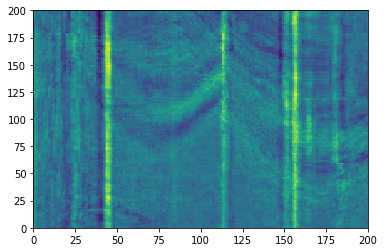

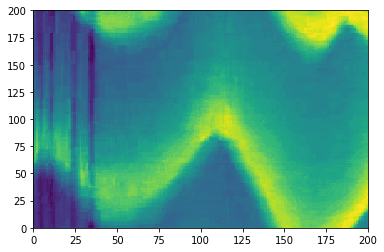

In [87]:
print(x_3d[0,:,:].shape)
first = x_3d[0,:,:]
plt.pcolormesh(real(first))
plt.show()
plt.pcolormesh(BZ_tensor[:200,:200,0])

In [93]:
error = norm(BZ_tensor_2d_small[:, :-1] - real(x).T) / norm(BZ_tensor_2d_small)
print(error)
# print(norm(BZ_tensor_2d_small[:, :-1] - x.T))
# print(norm(BZ_tensor_2d_small[:, :-1]))
# print(BZ_tensor_2d_small[:, :-1] - real(x).T)

3.3408866636281283


Text(0.5, 1.0, 'Error of testing data on BZ dataset ')

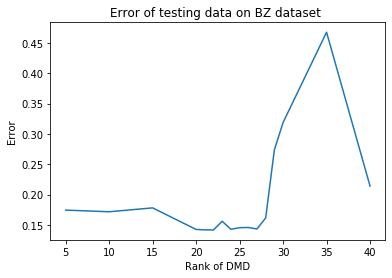

In [181]:
points = [5, 10, 15, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 35, 40]
error_list = []
for i in points:
    #do DMD
    Phi, Lambda, b = DMD(BZ_tensor_2d_small[:, :150],BZ_tensor_2d_small[:,1:151],i)
    
    #predict
    x = []
    for t in range(350):
        x_t = matmul(Phi, matmul((Lambda ** t), b))#np.matmul(Phi, scipy.linalg.expm(Omega * t) * np.matrix.transpose(b))
        x.append(x_t)
    x = array(x)
    
    #find error
    error = norm(BZ_tensor_2d_small[:, 150:-1] - real(x[150:]).T) / norm(BZ_tensor_2d_small[:, 150:-1])
    error_list.append(error)
    
plt.plot(points, error_list)
plt.xlabel("Rank of DMD")
plt.ylabel("Error")
plt.title("Error of testing data on BZ dataset ")

Text(0.5, 1.0, 'Error of testing data on BZ dataset ')

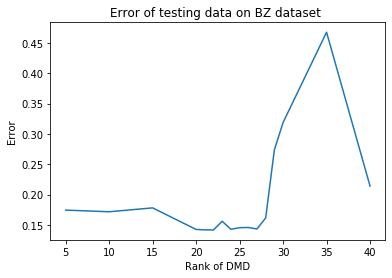

In [119]:
plt.plot(points, error_list)
plt.xlabel("Rank of DMD")
plt.ylabel("Error")
plt.title("Error of testing data on BZ dataset ")

(350, 200, 200)
(200, 200)


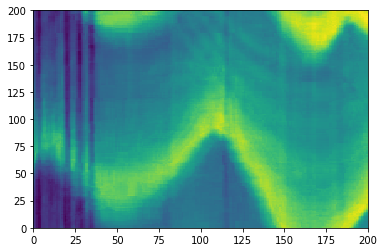

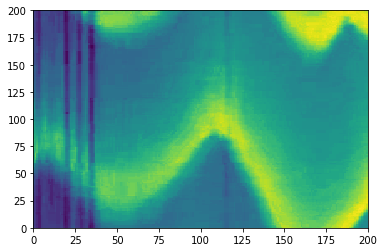

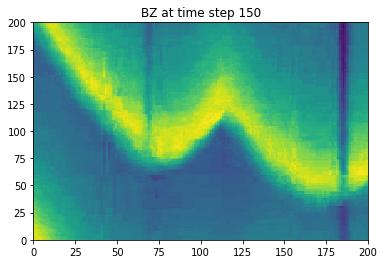

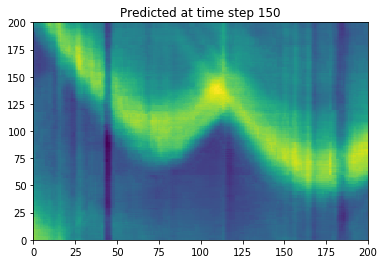

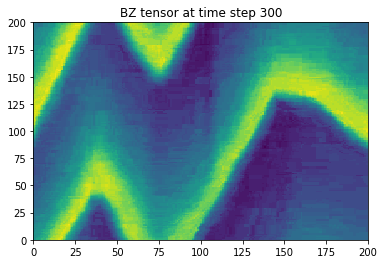

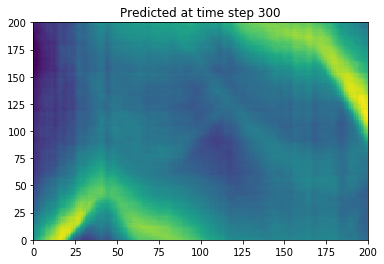

In [235]:
#plotting some figure for the best rank
i = 26
#do DMD
Phi, Lambda, b = DMD(BZ_tensor_2d_small[:, :150],BZ_tensor_2d_small[:,1:151],i)

#predict
x = []
for t in range(350):
    x_t = matmul(Phi, matmul((Lambda ** t), b))#np.matmul(Phi, scipy.linalg.expm(Omega * t) * np.matrix.transpose(b))
    x.append(x_t)
x = array(x)
x_3d = reshape(x, [350, 200,200])
print(x_3d.shape)

#find error
error = norm(BZ_tensor_2d_small[:, 150:-1] - real(x[150:]).T) / norm(BZ_tensor_2d_small[:, 150:-1])
error_list.append(error)
    
print(x_3d[0,:,:].shape)
first = x_3d[1,:,:]
plt.pcolormesh(real(first))
# plt.title('First ')
plt.show()
plt.pcolormesh(BZ_tensor[:200,:200,1])
plt.show()
plt.pcolormesh(BZ_tensor[:200,:200,150])
plt.title('BZ at time step 150')
plt.show()
plt.pcolormesh(real(x_3d[150,:,:]))
plt.title('Predicted at time step 150')
plt.show()
plt.pcolormesh(BZ_tensor[:200,:200,300])
plt.title('BZ tensor at time step 300')
plt.show()
plt.pcolormesh(real(x_3d[-1,:,:]))
plt.title('Predicted at time step 300')
plt.show()

### Time Delay Embedding

In [170]:
# print(transpose(BZ_tensor_2d_small[j, i:num+i]))
num = 100
H1 = []
for i in range(40):
    for j in range(40000):
        H1.append(transpose(BZ_tensor_2d_small[j, i:num+i]))
#     print(BZ_tensor_2d_small[:, i:num+i].shape)
H1 = array(H1)
print(H1.shape)

(1600000, 100)


(1600000, 100)
(100,)
(100, 100)


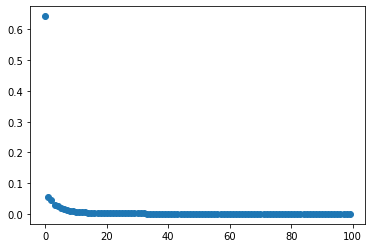

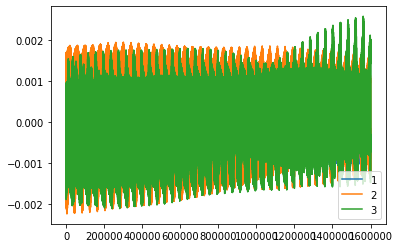

(100, 100)


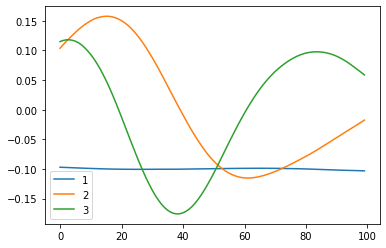

In [171]:
U,Sigma,VT = svd(H1,full_matrices=0) 
V = transpose(VT)
print(U.shape)
print(Sigma.shape)
print(V.shape)
# print(Sigma)
plt.plot(Sigma/ (sum(Sigma)), 'o')
plt.show()
plt.plot(U[:,0:3])
plt.legend(["1", "2", "3"])
plt.show()
print(V.shape)
plt.plot(V[:,0:3])
plt.legend(["1", "2", "3"])
plt.show()

In [247]:
Phi, Lambda, b = DMD(H1[:, :-1],H1[:, 1:],30)

In [255]:
x = []
for t in [300]:
    x_t = matmul(Phi, matmul(Lambda ** t, b))
    x.append(x_t)
x = array(x)
print(x.shape)

(1, 1600000)


In [212]:
200*200*40

1600000

(1, 1600000)
(1600000,)
(40, 200, 200)


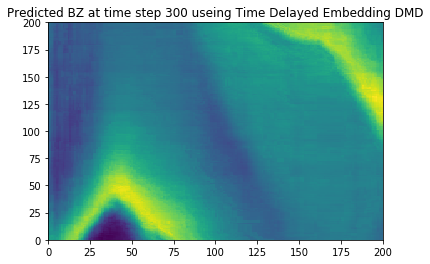

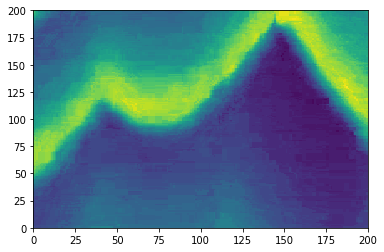

In [259]:
print(x.shape)
x1d = x[0,:]
print(x1d.shape)
x2d = reshape(x1d, [40, 200,200])
print(x2d.shape)
plt.pcolormesh(real(x2d[0,:,:]))
plt.title('Predicted BZ at time step 300 useing Time Delayed Embedding DMD')
plt.show()
plt.pcolormesh(BZ_tensor[:200,:200,350])
plt.show()

In [231]:
x1d = x[0,:]
x2d = reshape(x1d, [40,200,200])
print(norm(x2d - BZ_tensor[:200,:200,100]) / norm(BZ_tensor[:200,:200,100]))
x1d = x[1,:]
x2d = reshape(x1d, [40,200,200])
print(norm(x2d - BZ_tensor[:200,:200,101]) / norm(BZ_tensor[:200,:200,101]))
# x1d = x[0,:]
x2d = reshape(x, [11,40,200,200])
x2d = x2d[:,0,:,:]
print(norm(transpose(x2d) - BZ_tensor[:200,:200,100:111]) / norm(BZ_tensor[:200,:200,100:111]))

1.027874596125735
1.041741532714143
0.1463920865968868
